In [1]:
import pandas as pd

In [2]:
operations_data = pd.read_csv('doordash powers operations.csv')

In [3]:
operations_data.head()

,Granularity,Start Date,End Date,Store Name,Store ID,Business ID,Merchant Supplied ID,Total Orders Including Cancelled Orders,Total Delivered or Picked Up Orders,Total Missing or Incorrect Orders,...,Average Dasher Wait,Average Delivery Time (ASAP),Uptime %,Downtime %,Total Downtime in Minutes,Average Rating,Total Number of Ratings Received in Period of Time,Total 1 Star Ratings,Total 5 Star Ratings,Currency
0,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (1447-LINDNWLD-W HORSE),657157,5579,1447,857,850,32,...,5.20,20.14,100.00,0.00,0,4.67,57,3,50,USD
1,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (4592-OCEAN CITY),659406,5579,4592,289,281,23,...,5.36,24.70,99.62,0.38,30,4.33,15,0,10,USD
2,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (12008-CROSS KEYS),946236,5579,12008,291,286,11,...,5.72,25.72,99.63,0.37,30,4.44,18,1,14,USD
3,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (18170-NO WOODBURY),946241,5579,18170,558,553,28,...,4.62,18.10,98.91,1.09,89,4.45,40,3,32,USD
4,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (18576-WINSLOW),946252,5579,18576,509,499,28,...,6.16,21.29,98.55,1.45,119,4.13,32,3,20,USD


In [4]:
operations_data.columns

Index(['Granularity', 'Start Date', 'End Date', 'Store Name', 'Store ID',
       'Business ID', 'Merchant Supplied ID',
       'Total Orders Including Cancelled Orders',
       'Total Delivered or Picked Up Orders',
       'Total Missing or Incorrect Orders', 'Missing/Incorrect %',
       'Total Error Charges', 'Total Cancelled Orders',
       'Total Cancellation Rate %', 'Total Avoidable Cancellations',
       'Avoidable Cancellation Rate %', 'Point of Sale Error Rate %',
       'Average Avoidable Dasher Wait', 'Average Dasher Wait',
       'Average Delivery Time (ASAP)', 'Uptime %', 'Downtime %',
       'Total Downtime in Minutes', 'Average Rating',
       'Total Number of Ratings Received in Period of Time',
       'Total 1 Star Ratings', 'Total 5 Star Ratings', 'Currency'],
      dtype='object')

In [5]:
import pandas as pd

ops = pd.read_csv("doordash powers operations.csv", parse_dates=['Start Date','End Date'])
# define the list of numeric KPIs
kpis = [
    'Total Orders Including Cancelled Orders',
    'Total Delivered or Picked Up Orders',
    'Total Missing or Incorrect Orders',
    'Total Error Charges',
    'Total Cancelled Orders',
    'Total Downtime in Minutes',
    'Average Rating',
    # …etc
]

# group & aggregate
store_summary = (
    ops
      .groupby(['Store ID','Store Name'])[kpis]
      .agg(['sum','mean'])
)

# flatten MultiIndex columns
store_summary.columns = ['_'.join(col).strip() for col in store_summary.columns]


In [6]:
store_summary.reset_index()

,Store ID,Store Name,Total Orders Including Cancelled Orders_sum,Total Orders Including Cancelled Orders_mean,Total Delivered or Picked Up Orders_sum,Total Delivered or Picked Up Orders_mean,Total Missing or Incorrect Orders_sum,Total Missing or Incorrect Orders_mean,Total Error Charges_sum,Total Error Charges_mean,Total Cancelled Orders_sum,Total Cancelled Orders_mean,Total Downtime in Minutes_sum,Total Downtime in Minutes_mean,Average Rating_sum,Average Rating_mean
0,657157,McDonald's (1447-LINDNWLD-W HORSE),6807,680.7,6756,675.6,258,25.8,1741.32,174.132,51,5.1,92,9.2,43.32,4.332
1,659406,McDonald's (4592-OCEAN CITY),2182,218.2,2119,211.9,97,9.7,924.81,92.481,63,6.3,270,27.0,37.11,3.711
2,946236,McDonald's (12008-CROSS KEYS),2603,260.3,2573,257.3,66,6.6,452.46,45.246,30,3.0,240,24.0,40.90,4.090
3,946241,McDonald's (18170-NO WOODBURY),4731,473.1,4708,470.8,251,25.1,1745.52,174.552,23,2.3,190,19.0,42.90,4.290
4,946252,McDonald's (18576-WINSLOW),3464,346.4,3408,340.8,217,21.7,1599.38,159.938,56,5.6,371,37.1,40.36,4.036
5,946258,McDonald's (2401-TURNERSVILLE),2525,252.5,2508,250.8,72,7.2,603.70,60.370,17,1.7,129,12.9,43.36,4.336
6,946269,McDonald's (4884-WILLIAMSTOWN),6127,612.7,6080,608.0,240,24.0,1849.92,184.992,47,4.7,239,23.9,42.48,4.248
7,1544219,McDonald's (22137 - WRIGHTSTOWN),1574,157.4,1540,154.0,43,4.3,350.03,35.003,34,3.4,853,85.3,42.58,4.258
8,1544237,"McDonald's (21452 - RT 545, BROWNS MILLS)",3943,394.3,3902,390.2,168,16.8,1082.89,108.289,41,4.1,276,27.6,43.65,4.365


In [7]:
# derive custom metrics
ops['Cancellation Rate'] = ops['Total Cancelled Orders'] / ops['Total Orders Including Cancelled Orders']
ops['Downtime per Order (min)'] = ops['Total Downtime in Minutes'] / ops['Total Orders Including Cancelled Orders']

# now rank
bench = (
    ops
    .groupby(['Store ID','Store Name'])
    [['Cancellation Rate','Downtime per Order (min)']]
    .mean()
    .sort_values('Cancellation Rate')
)  # top 10 best stores on cancellation


In [8]:
bench.head(10)

,,Cancellation Rate,Downtime per Order (min)
Store ID,Store Name,,
946241,McDonald's (18170-NO WOODBURY),0.004144,0.032268
946258,McDonald's (2401-TURNERSVILLE),0.006555,0.040868
657157,McDonald's (1447-LINDNWLD-W HORSE),0.006770,0.013462
946269,McDonald's (4884-WILLIAMSTOWN),0.008153,0.034522
1544237,"McDonald's (21452 - RT 545, BROWNS MILLS)",0.009745,0.069623
946236,McDonald's (12008-CROSS KEYS),0.010732,0.131454
946252,McDonald's (18576-WINSLOW),0.016016,0.086697
1544219,McDonald's (22137 - WRIGHTSTOWN),0.019969,0.641353
659406,McDonald's (4592-OCEAN CITY),0.022904,0.115128


<Axes: xlabel='Week of'>

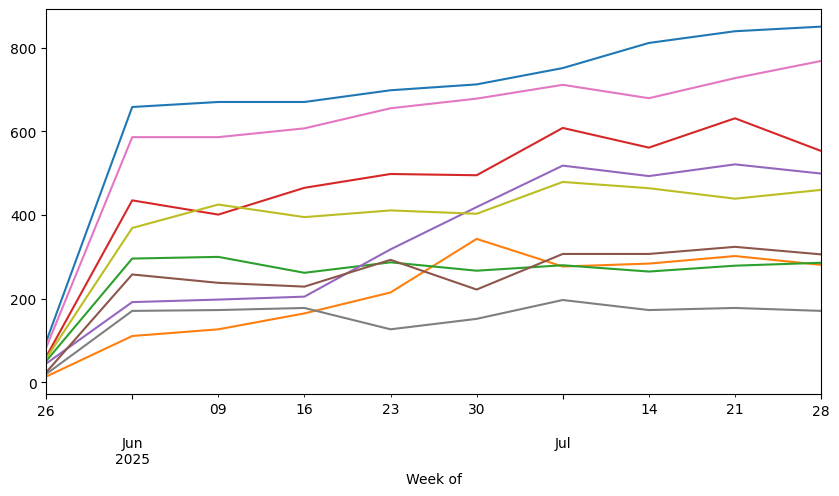

In [9]:
# copy Start Date into a new column called Week of
ops['Week of'] = pd.to_datetime(ops['Start Date'])

ops_ts = (
    ops
    .set_index('Week of')
    .pivot_table(
        index='Week of',
        columns='Store ID',
        values='Total Delivered or Picked Up Orders',
        aggfunc='sum'
    )
)

ops_ts.plot(legend=False, figsize=(10,5))

In [10]:
import pandas as pd

# 1. Parse dates and define the “week” (using Start Date)
ops['Start Date'] = pd.to_datetime(ops['Start Date'])
# we’ll floor to the week’s Monday; change “W-MON” if your week starts on a different day
ops['Week'] = ops['Start Date'].dt.to_period('W-MON').apply(lambda r: r.start_time)

# 2. Choose the metrics you want WoW for
metrics = [
    'Total Delivered or Picked Up Orders',
    'Total Cancelled Orders',
    'Total Missing or Incorrect Orders',
    'Total Downtime in Minutes',
]

# 3. Aggregate weekly sums, per store
weekly = (
    ops
      .groupby(['Store ID','Store Name','Week'])[metrics]
      .sum()
      .reset_index()
)

# 4. Sort & compute WoW % change per store
weekly = weekly.sort_values(['Store ID','Week'])
for m in metrics:
    weekly[f'{m} WoW %'] = weekly.groupby('Store ID')[m] \
                                   .pct_change() * 100

# 5. Inspect
print(weekly.head(12))


    Store ID                          Store Name       Week  \
0     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-05-20   
1     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-05-27   
2     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-06-03   
3     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-06-10   
4     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-06-17   
5     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-06-24   
6     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-07-01   
7     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-07-08   
8     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-07-15   
9     657157  McDonald's (1447-LINDNWLD-W HORSE) 2025-07-22   
10    659406        McDonald's (4592-OCEAN CITY) 2025-05-20   
11    659406        McDonald's (4592-OCEAN CITY) 2025-05-27   

    Total Delivered or Picked Up Orders  Total Cancelled Orders  \
0                                    97                       0   
1                                   658       

<Axes: title={'center': 'WoW % Change in Delivered Orders by Store'}, xlabel='Week'>

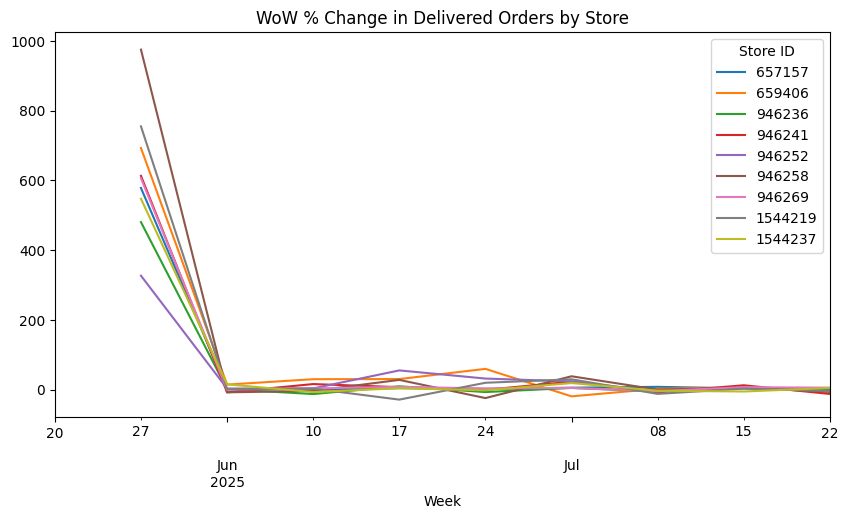

In [11]:
wow_pivot = (
    weekly
      .pivot(index='Week', columns='Store ID', values='Total Delivered or Picked Up Orders WoW %')
)
wow_pivot.plot(figsize=(10,5), title="WoW % Change in Delivered Orders by Store")

In [12]:
# 1a. First compute the base rates
weekly['Cancellation Rate'] = (
    weekly['Total Cancelled Orders'] /
    weekly['Total Delivered or Picked Up Orders']
)
weekly['Downtime per Order'] = (
    weekly['Total Downtime in Minutes'] /
    weekly['Total Delivered or Picked Up Orders']
)

# 1b. Then pct_change on those too
for col in ['Cancellation Rate','Downtime per Order']:
    weekly[f'{col} WoW %'] = weekly.groupby('Store ID')[col].pct_change() * 100


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# — assume you already have these two DataFrames from your earlier code:
#    top_gainers  &  top_losers
#    both with columns ['Store Name', 'Total Delivered or Picked Up Orders WoW %']

# 1) Build a single table with a “Type” flag
gainers = top_gainers[['Store Name','Total Delivered or Picked Up Orders WoW %']].copy()
gainers['Type'] = 'Gainer'
losers  = top_losers [['Store Name','Total Delivered or Picked Up Orders WoW %']].copy()
losers ['Type'] = 'Loser'

summary = pd.concat([gainers, losers], ignore_index=True)
summary = summary.rename(columns={
    'Total Delivered or Picked Up Orders WoW %': 'WoW %'
})

# Display the table sorted by Type then WoW %
print(summary.sort_values(['Type','WoW %'], ascending=[True, False]).to_string(index=False))

# 2) Side-by-side horizontal bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Gainers
gainers.plot.barh(
    x='Store Name', y='Total Delivered or Picked Up Orders WoW %',
    ax=ax1, legend=False
)
ax1.set_title('Top 5 WoW Gainers')
ax1.set_xlabel('WoW %')

# Losers
losers.plot.barh(
    x='Store Name', y='Total Delivered or Picked Up Orders WoW %',
    ax=ax2, legend=False,
    color='C1'
)
ax2.set_title('Top 5 WoW Losers')
ax2.set_xlabel('WoW %')

plt.tight_layout()
plt.show()


NameError: name 'top_gainers' is not defined

In [14]:
def style_wow(df):
    return (
        df.style
          .format({'WoW %': '{:+.2f}%'} )
          .bar(subset='WoW %', cmap='RdYlGn', vmin=-10, vmax=10)
          .set_properties(**{'font-family':'Arial','font-size':'12px'})
    )

# build the summary table as before
summary = pd.concat([gainers, losers], ignore_index=True)
summary = summary.rename(columns={'Total Delivered or Picked Up Orders WoW %':'WoW %'})

# apply styling
style_wow(summary.sort_values(['Type','WoW %'], ascending=[True, False]))


NameError: name 'gainers' is not defined